In [188]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Data science on responses to Automatique & Santé questionnaire
Action GDR MACS, Jérome Cieslak, Antoine Chaillet, JJ Aucouturier &copy; 2022

## Data from _Manifestation d'intérêt_ 

In [123]:
manifest_df = pd.read_csv('data/manifestation_interet.csv', encoding='latin1')

### Rename columns

In [124]:
manifest_df = manifest_df.rename(columns={'Horodateur':'date',
                                          'Quel est votre nom?':'last_name',
                                          'Quel est votre prénom?':'first_name', 
                                          'Si oui, dans quel domaine applicatif ? ':'clinical_domains',
                                          'Au travers de quels outils méthodologiques ?':'control_domains',
                                          'Si ces travaux ont déjà donné lieu à des publications, merci de nous en donner la liste:':'publication_list',
                                          'Sur le principe, seriez-vous intéressé par les actions suivantes (cette réponse ne constitue en rien un engagement de votre part!)':'interests',
                                          "Connaissez-vous des collègues (en France) dont les activités de recherche relèvent des outils de l'automatique utilisés pour la santé?":'recommendations',
                                          'Des suggestions ? Des remarques ?':'remarks'
                           })
manifest_df = manifest_df.drop(columns=['Avez-vous déjà travaillé sur des thématiques liant Automatique et Santé ou comptez-vous aborder de telles questions ?'])

In [79]:
manifest_df

,date,last_name,first_name,clinical_domains,control_domains,publication_list,interests,recommendations,remarks
0,1/8/2022 15:45:55,AUCOUTURIER,Jean-Julien,"Neuroscience, Système cardio-respiratoire","Modélisation, Identification",https://www.nature.com/articles/s41467-020-206...,Etre informé par mail sur des actions scientif...,Ning Liu (ning.liu@femto-st.fr) port-hamiltoni...,Neuro team (https://neuro-team-femto.github.io...
1,1/6/2022 11:57:31,Auriol,Jean,Neuroscience,"Identification, Commande, Observateurs",NaN,Etre informé par mail sur des actions scientif...,NaN,NaN
2,1/10/2022 11:10:15,Fiacchini,Mirko,"Cancérologie, Anésthesie","Identification, Commande","K. Moussa, M. Fiacchini, M. Alamir, Robust dom...",Etre informé par mail sur des actions scientif...,NaN,NaN
3,1/7/2022 16:49:34,Greco,Luca,"Neuroscience, Respiration artificielle","Modélisation, Analyse, Commande",Pas encore ...,Etre informé par mail sur des actions scientif...,Bastien Berret,Pas pour l'instant. C'est une très bonne idée.
4,1/7/2022 9:50:50,Laleg,Meriem,"Neuroscience, Diabète, Système cardio-respirat...","Modélisation, Identification, Commande, Observ...","Selected Journals\n-A. Maghbool, M. Bahloul, T...",Etre informé par mail sur des actions scientif...,oui,je reste disponible pour aider....
5,1/12/2022 18:18:58,Magdelaine,Nicolas,Diabète,"Modélisation, Identification, Commande, Observ...","H. Gonzalez, P. S. Rivadeneira, A. Ferramosca,...",Etre informé par mail sur des actions scientif...,NaN,Merci pour cette initiative
6,1/6/2022 15:35:19,MELCHIOR,Pierre,"Système cardio-respiratoire, modélisation muscle","Modélisation, Identification","L. SOMMACAL, P. MELCHIOR, A. DOSSAT, J. PETIT,...",Etre informé par mail sur des actions scientif...,Oui,NaN
7,1/6/2022 14:23:00,Mounier,Hugues,"Neuroscience, Diabète, Système cardio-respirat...","Modélisation, Analyse, Commande, Observateurs",NaN,Etre informé par mail sur des actions scientif...,NaN,NaN
8,1/13/2022 9:27:26,Pasillas-Lépine,William,"Neuroscience, Système cardio-respiratoire","Modélisation, Identification, Analyse, Command...","""Promis: ça ne prend pas longtemps et ça ne vo...",Etre informé par mail sur des actions scientif...,Oui,Non
9,1/6/2022 12:42:27,Postoyan,Romain,Neuroscience,Observateurs,(je n'indique que les papiers journaux) \n\nY....,Etre informé par mail sur des actions scientif...,Mirko Fiacchini (Gipsa),NaN


### Parse categories from multiple-choice questions

#### Clinical domains

In [140]:
# split list in each column and explode as separate rows 
manifest_df.clinical_domains = manifest_df.clinical_domains.str.split(',')
manifest_df = manifest_df.explode('clinical_domains')

In [141]:
# rename duplicates: some values include white space or different accents
rename_clinical_domains = {'Neuroscience':'Neuroscience',
          'Système cardio-respiratoire':'Cardio-respiratoire',
          'Cancérologie':'Cancer',
          ' Anésthesie':'Anesthésie',
          ' Respiration artificielle':'Respiration artificielle',
          ' Diabète':'Diabète',
          ' Cancérologie':'Cancer',
          'Diabète':'Diabète',
          ' Système cardio-respiratoire':'Cardio-respiratoire',
          ' modélisation muscle':'Muscle',
          ' Méditation':'Méditation',
          'Anesthésie':'Anesthésie'}
manifest_df.clinical_domains = manifest_df.clinical_domains.apply(lambda row: rename_clinical_domains[row])   


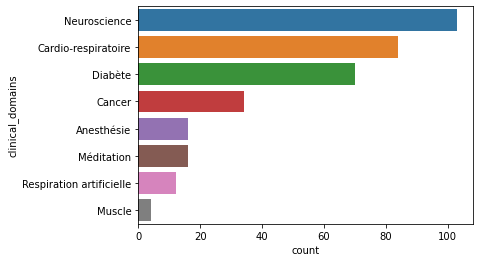

In [143]:
sns.countplot(y="clinical_domains", 
              order = manifest_df.groupby(['clinical_domains']).last_name.count().reset_index().sort_values(by='last_name',
                                                                                                     ascending=False).clinical_domains,
              
              data=manifest_df)

#### Control domains

In [135]:
# split list in each column and explode as separate rows 
manifest_df.control_domains = manifest_df.control_domains.str.split(',')
manifest_df = manifest_df.explode('control_domains')

In [136]:
# rename duplicates: white space and accents
rename_control_domains = {'Modélisation':'Modélisation',
                          ' Identification':'Identification',
                          'Identification':'Identification',
                          ' Commande':'Commande',
                          ' Observateurs':'Observateurs',
                          ' Analyse':'Analyse',
                          ' Traitement du signal ':'Traitement du signal',
                          'Observateurs':'Observateurs',
                          'Commande':'Commande',
                          'Analyse':'Analyse'}
manifest_df.control_domains = manifest_df.control_domains.apply(lambda row: rename_control_domains[row])   


In [137]:
manifest_df.groupby(['control_domains']).last_name.count()

control_domains
Analyse                 16
Commande                39
Identification          30
Modélisation            36
Observateurs            26
Traitement du signal     6
Name: last_name, dtype: int64

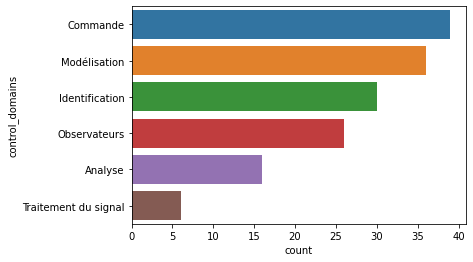

In [138]:
sns.countplot(y="control_domains", 
              order = manifest_df.groupby(['control_domains']).last_name.count().reset_index().sort_values(by='last_name',
                                                                                                     ascending=False).control_domains,
              data=manifest_df)

#### Interests

In [125]:
# split list in each column and explode as separate rows 
manifest_df.interests = manifest_df.interests.str.replace(';',',') # some choices are semi-colon separated
manifest_df.interests = manifest_df.interests.str.split(',')
manifest_df = manifest_df.explode('interests')

In [126]:
# some values are split across different rows, as they include commas
# rename so each value is a separate category
rename_interests = {"Etre informé par mail sur des actions scientifiques autour de l'Automatique et de la santé":'informé par email',
                    ' Participer à des journées scientifiques dédiées':'participer journées scientifiques',
       ' Contribuer à des publications communes (livre blanc': 'participer à des publications',
       ' vulgarisation':np.nan,
        ' survey':np.nan,
        ' conférences':np.nan,
                    ' journaux':np.nan,
                    '...)':np.nan,
       " toute action facilitant l'accès à des practiciens hospitaliers pour conduire des tests cliniques": 'faciliter accès aux médecins',
       ' toute action permettant de trouver des étudiants candidats à stages de master et thèse sur la thématique. . ':'faciliter recrutement étudiants',
       ' Avoir accès à un site web recensant les activités sur ce thèmes':'site web dédié',
        ' Accès aux données':'faciliter accès aux données',
        ' créer une base de données pour échange':'faciliter accès aux médecins',
                    ' opportunités de collaborations aves des médecins':np.nan,
                    ' avoir des subventions pour des stages de M2 ou pour des essais cliniques':'financements dédiés'}
manifest_df.interests = manifest_df.interests.apply(lambda row: rename_interests[row])   

# drop nans
manifest_df = manifest_df.dropna(subset=['interests'])


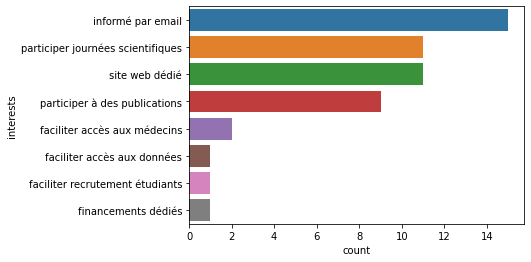

In [133]:
sns.countplot(y="interests",
              order = manifest_df.groupby(['interests']).last_name.count().reset_index().sort_values(by='last_name',
                                                                                                     ascending=False).interests,
              data=manifest_df)

## Data from _Questionnaire_ 

In [155]:
question_df = pd.read_csv('data/reponses_20_07_2022.csv', encoding='latin1')

In [157]:
# drop columns that are all na
question_df = question_df.dropna(axis='columns',how='all')

In [160]:
list(question_df)

['Horodateur',
 'Quel est votre prÃ©nom ?',
 'Quel est votre adresse mail?',
 'Quel est votre statut?.2',
 'Quel est votre employeur?',
 'Avez-vous dÃ©jÃ\xa0 travaillÃ© sur des thÃ©matiques liant Automatique et SantÃ© ou comptez-vous aborder de telles questions ?',
 'Au travers de quels outils mÃ©thodologiques?',
 'Avec quel(le)s praticien(ne)s hospitalier(e)s (en France ou Ã\xa0 lâ\x80\x99Ã©tranger) travaillez-vous (service, hÃ´pital, adresse mail bienvenue) ?',
 'Quel est votre laboratoire?',
 'Quel est votre nom ?',
 "Si oui, il s'agit de l'automatique pour?",
 'Au travers de quel type de financement?',
 'Si ces travaux ont dÃ©jÃ\xa0 donnÃ© lieu Ã\xa0 des publications, merci de nous en donner la liste:.1',
 'Seriez-vous intÃ©ressÃ© par les actions suivantes:.2',
 'Avec quels acteurs industriels (en France ou Ã\xa0 lâ\x80\x99Ã©tranger) travaillez-vous sur ces applications (nom, adresse mail bienvenue) ?',
 'Avec quel(le)s collÃ¨gues non automaticien(ne)s (en France ou Ã\xa0 lâ\x80\x9

In [159]:
for col in list(question_df):
    print('%s \t %s'%(col,question_df.loc[0,col]))

Horodateur 	 16/05/2022 09:42:46
Quel est votre prÃ©nom ? 	 Antoine
Quel est votre adresse mail? 	 antoine.chaillet@centralesupelec.fr
Quel est votre statut?.2 	 PU
Quel est votre employeur? 	 Ecole d'ingÃ©nieurs CentraleSupÃ©lec
Avez-vous dÃ©jÃ  travaillÃ© sur des thÃ©matiques liant Automatique et SantÃ© ou comptez-vous aborder de telles questions ? 	 Oui
Au travers de quels outils mÃ©thodologiques? 	 ModÃ©lisation, Analyse, Commande, Observateurs
Avec quel(le)s praticien(ne)s hospitalier(e)s (en France ou Ã  lâÃ©tranger) travaillez-vous (service, hÃ´pital, adresse mail bienvenue) ? 	 Suhan Senova, hopital Henri Mondor de CrÃ©teil, yann.senova@aphp.fr; StÃ©phane Palfi, idem; Jean-Pascal Lefaucheur, idem
Quel est votre laboratoire? 	 L2S
Quel est votre nom ? 	 Chaillet
Si oui, il s'agit de l'automatique pour? 	 Les neurosciences ou la psychatrie
Au travers de quel type de financement? 	 RÃ©gional, National (ANR, ...)
Si ces travaux ont dÃ©jÃ  donnÃ© lieu Ã  des publications, merci de

### Rename columns

In [169]:
# give clean names
question_df = question_df.rename(columns={'Horodateur':'date',
                                          'Quel est votre nom ?':'last_name',
                                          'Quel est votre prÃ©nom ?':'first_name', 
                                          'Quel est votre adresse mail?':'email',
                                          'Quel est votre statut?.2':'position',
                                          'Quel est votre employeur?':'employer',
                                          'Au travers de quels outils mÃ©thodologiques?':'control_domains',
                                          'Avec quel(le)s praticien(ne)s hospitalier(e)s (en France ou Ã\xa0 lâ\x80\x99Ã©tranger) travaillez-vous (service, hÃ´pital, adresse mail bienvenue) ?':'doctor_list',
                                          'Quel est votre laboratoire?':'affiliation',
                                          "Si oui, il s'agit de l'automatique pour?":'clinical_domains',
                                          'Au travers de quel type de financement?':'funding',
                                          'Si ces travaux ont dÃ©jÃ\xa0 donnÃ© lieu Ã\xa0 des publications, merci de nous en donner la liste:.1':'publication_list',
                                          'Seriez-vous intÃ©ressÃ© par les actions suivantes:.2':'interests',
                                          'Avec quels acteurs industriels (en France ou Ã\xa0 lâ\x80\x99Ã©tranger) travaillez-vous sur ces applications (nom, adresse mail bienvenue) ?':'industry_list',
                                          'Avec quel(le)s collÃ¨gues non automaticien(ne)s (en France ou Ã\xa0 lâ\x80\x99Ã©tranger) travaillez-vous (ou envisagez-vous de travailler) sur ces thÃ©matiques (nom, adresse mail bienvenue) ?':'non_control_collaborators',
                                          'Selon vous, quels sont les principaux freins Ã\xa0 une recherche interdisciplinaire mÃªlant automatique & santÃ© ?.3':'pain_points',
                                          'Selon vous, quels sont les acteurs majeurs (au niveau mondial) sur la recherche en Automatique au service de la santÃ© ?.1':'international_best',
                                          'Des suggestions ? Des remarques ?.1':'remarks'})
question_df = question_df.drop(columns=['Avez-vous dÃ©jÃ\xa0 travaillÃ© sur des thÃ©matiques liant Automatique et SantÃ© ou comptez-vous aborder de telles questions ?'])

### Fix duplicates

#### Position

In [173]:
question_df.position.unique()

array(['PU', 'Doctorant', 'MaÃ®tre de confÃ©rences', 'DR', 'Post-Doc',
       'DR Ã©mÃ©rite', 'CR', 'ITA (ex. IE, IR)', 'professeur',
       'PU Ã©mÃ©rite', 'Assistant Professor', 'Enseignant Chercheur',
       'Je ne connais pas son statut (enseignant-chercheur)',
       'IngÃ©nieur de recherche'], dtype=object)

In [175]:
# rename duplicates: some values include white space or different accents
rename_position = {'PU':'PU/Professor',
                   'Doctorant':'PhD student',
                   'MaÃ®tre de confÃ©rences':'MCU/Assistant Professor',
                   'DR':'Directeur de recherche',
                   'Post-Doc':'Postdoc',
                   'DR Ã©mÃ©rite':'Emeritus',
                   'CR':'Chargé de recherche',
                   'ITA (ex. IE, IR)':'Ingénieur Etude/Recherche',
                   'professeur':'PU/Professor',
                   'PU Ã©mÃ©rite':'Emeritus',
                   'Assistant Professor':'MCU/Assistant Professor', 
                   'Enseignant Chercheur':'MCU/Assistant Professor',
                   'Je ne connais pas son statut (enseignant-chercheur)':np.nan,
                   'IngÃ©nieur de recherche':'Ingénieur Etude/Recherche'}
question_df.position = question_df.position.apply(lambda row: rename_position[row]) 

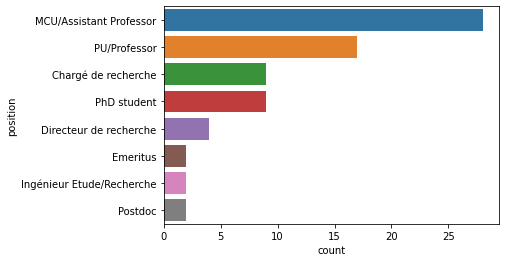

In [176]:
sns.countplot(y="position",
              order = question_df.groupby(['position']).last_name.count().reset_index().sort_values(by='last_name',
                                                                                                     ascending=False).position,
              data=question_df)

#### Employer

In [181]:
question_df.employer.unique()

array(["Ecole d'ingénieur", 'Université', 'CNRS', 'Industry', 'Hospital',
       'INRIA', 'ONERA'], dtype=object)

In [179]:
# rename duplicates: 
rename_employer = {"Ecole d'ingÃ©nieurs CentraleSupÃ©lec": "Ecole d'ingénieur",
                   'UniversitÃ©':'Université',
                   'CNRS':'CNRS',
                   'CEGEDIM Groupe':'Industry',
                   'Grenoble-INP':"Ecole d'ingénieur",
                   'CentraleSupÃ©lec':"Ecole d'ingénieur",
                   'IRT Jules Verne':"Ecole d'ingénieur",
                   'IMT Mines Ales':"Ecole d'ingénieur",
                   'Centrale Nantes':"Ecole d'ingénieur",
                   'ENS Paris-Saclay':"Ecole d'ingénieur",
                   'CHU 80% / Centrale 20%':'Hospital',
                   'Grand Ecole':"Ecole d'ingénieur",
                   'Bordeaux INP':"Ecole d'ingénieur",
                   'ISAE-SUPAERO':"Ecole d'ingénieur",
                   'ESTIA':"Ecole d'ingénieur",
                   'INRIA':'INRIA',
                   'ENSMM':"Ecole d'ingénieur",
                   'ENSMM (SupMicroTech)':"Ecole d'ingénieur",
                   'ONERA':'ONERA',
                   'ENSEA':"Ecole d'ingénieur"}
question_df.employer = question_df.employer.apply(lambda row: rename_employer[row]) 

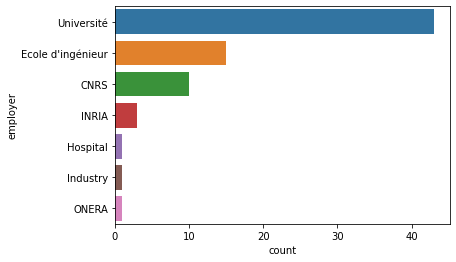

In [182]:
sns.countplot(y="employer",
              order = question_df.groupby(['employer']).last_name.count().reset_index().sort_values(by='last_name',
                                                                                                     ascending=False).employer,
              data=question_df)

#### Affiliation

In [184]:
question_df.affiliation.unique()

array(['L2S', 'IMS Bordeaux', 'DISP', 'GIPSA-lab', 'CResTIC',
       'Laboratoire GÃ©nie et MatÃ©riaux Textiles (GEMTEX)',
       'LISSI EA 3956', 'LAMIH', 'gipsa-lab', 'LIS (Caen)', 'LIMOS',
       'IMS', 'LS2N UMR 6004 CNRS', 'AmpÃ¨re (UMR 5005)', 'CRAN', 'LS2N',
       'CERIS/PFM', 'LAMIH UMR CNRS 8201', 'ECN/LS2N UMR 6004', 'LURPA',
       'GIPSA-Lab', 'ESTAS', 'AmpÃ¨re UMR CNRS 5005', 'LAS2E',
       'LAS2E Enim Tunisie', 'Burlion Research L', 'ISAE-SUPAERO',
       'CRCA-CBI', 'LAAS-CNRS', 'ESTIA Recherche', 'IRIMAS', 'LIRYC',
       'Equipe SISTM, Inria Bordeaux, Inserm U1219', 'IETR', 'LJLL',
       'LAAS', 'FEMTO-ST', 'FEMTO-ST (AS2M department)', 'CRIStAL',
       'LAGEPP', 'UMR STMS', 'IDEES Le Havre CNRS 6266', 'ONERA/DTIS',
       'Institut FEMTO-ST', 'Quartz',
       "Laboratoire d'Automatique, SystÃ¨mes Ã\x89lectriques et Environnement (LAS2E) ENIM-Tunisie"],
      dtype=object)

In [185]:
# rename duplicates/common formatting: 
rename_affiliation = {'L2S':'Laboratoire des signaux et systèmes (L2S, UMR 8506)',
                      'IMS Bordeaux': 'Laboratoire de l’Intégration du Matériau au Système (IMS, UMR 5218)',
                      'DISP': 'Décision & Information pour les Systèmes de Production (DISP, UR 4570)',
                      'GIPSA-lab': 'Laboratoire Grenoble Images Parole Signal Automatique (GIPSA-Lab, UMR5216)',
                      'CResTIC':'Centre de Recherche en STIC (CReSTIC, EA 3804)',
                      'Laboratoire GÃ©nie et MatÃ©riaux Textiles (GEMTEX)': 'Laboratoire de génie et matériaux textiles (GEMTEX, EA 2461)',
                      'LISSI EA 3956':'Laboratoire Images, Signaux et Systèmes Intelligents (LISSI, EA 3956)',
                      'LAMIH':"Laboratoire d'Automatique de Mécanique et d'Informatique industrielles et Humaines (LAMIH, UMR 8201)",
                      'gipsa-lab':'Laboratoire Grenoble Images Parole Signal Automatique (GIPSA-Lab, UMR5216)',
                      'LIS (Caen)':"Laboratoire d'ingénierie des systèmes (LIS, UR 7478)",
                      'LIMOS':"Laboratoire d'Informatique, de Modélisation et d'Optimisation des Systèmes (LIMOS, UMR 6158)",
                      'IMS':'Laboratoire de l’Intégration du Matériau au Système (IMS, UMR 5218)',
                      'LS2N UMR 6004 CNRS':'Laboratoire des Sciences du Numérique de Nantes (LS2N, UMR6004)',
                      'AmpÃ¨re (UMR 5005)':'Laboratoire Ampère (UMR 5005)',
                      'CRAN':'Centre de Recherche en Automatique de Nancy (CRAN, UMR7039)',
                      'LS2N':'Laboratoire des Sciences du Numérique de Nantes (LS2N, UMR6004)',
                      'CERIS/PFM': "Centre d'Enseignement et de Recherche en Informatique et Systèmes (CERIS)",
                      'LAMIH UMR CNRS 8201': "Laboratoire d'Automatique de Mécanique et d'Informatique industrielles et Humaines (LAMIH, UMR 8201)",
                      'ECN/LS2N UMR 6004':'Laboratoire des Sciences du Numérique de Nantes (LS2N, UMR6004)',
                      'LURPA':'Laboratoire Universitaire de Recherche en Production Automatisée (LURPA, EA 1385)',
                      'GIPSA-Lab':'Laboratoire Grenoble Images Parole Signal Automatique (GIPSA-Lab, UMR5216)',
                      'ESTAS':"Institut français des sciences et technologies des transports, de l’aménagement et des réseaux (Ifsttar)",
                      'AmpÃ¨re UMR CNRS 5005':'Laboratoire Ampère (UMR 5005)',
                      'LAS2E':"Laboratoire d'Automatique, Systèmes Électriques et Environnement (LAS2E, Tunisie)",
                      'LAS2E Enim Tunisie':"Laboratoire d'Automatique, Systèmes Électriques et Environnement (LAS2E, Tunisie)",
                      'Burlion Research L':"Dept of Mechanical and Aerospace Engineering, Rutgers University, NJ. ",
                      'ISAE-SUPAERO':'Institut supérieur de l’aéronautique et de l’espace (ISAE-SUPAERO Recherche)',
                      'CRCA-CBI': "Centre de Recherches sur la Cognition Animale (CRCA, UMR 5169)",
                      'LAAS-CNRS': "Laboratoire d'analyse et d'architecture des systèmes (LAAS, UPR 8001)",
                      'ESTIA Recherche':"Ecole supérieure des technologies industrielles avancées (ESTIA Recherche)",
                      'IRIMAS':'Institut de Recherche en Informatique, Mathématiques, Automatique et Signal (IRIMAS, EA 7499)',
                      'LIRYC':'Institut De Rythmologie Et Modélisation Cardiaque (LIRYC, IHU)',
                      'Equipe SISTM, Inria Bordeaux, Inserm U1219': 'Centre de Recherche Inria Bordeaux - Sud-Ouest',
                      'IETR':"Institut d'Electronique et des Technologies du numéRique (IETR, UMR 6164)",
                      'LJLL':"Laboratoire Jacques-Louis Lions (LJLL, UMR 7598)",
                      'LAAS': "Laboratoire d'analyse et d'architecture des systèmes (LAAS, UPR 8001)",
                      'FEMTO-ST': "Franche-Comté Électronique Mécanique Thermique et Optique - Sciences et Technologies (FEMTO-ST, UMR 6174)",
                      'FEMTO-ST (AS2M department)':"Franche-Comté Électronique Mécanique Thermique et Optique - Sciences et Technologies (FEMTO-ST, UMR 6174)",
                      'CRIStAL':"Centre de Recherche en Informatique, Signal et Automatique de Lille (CRISTAL, UMR 9189)",
                      'LAGEPP':"Laboratoire d'Automatique et de Génie des Procédés (LAGEPP, UMR 5007)",
                      'UMR STMS': "Sciences et Technologies de la Musique et du Son (STMS, UMR 9912)",
                      'IDEES Le Havre CNRS 6266': "Identité et Différenciation de l'Espace, de l'Environnement et des Sociétés (IDEES, UMR 6266)",
                      'ONERA/DTIS': "Office national d'études et de recherches aérospatiales (ONERA)",
                      'Institut FEMTO-ST':"Franche-Comté Électronique Mécanique Thermique et Optique - Sciences et Technologies (FEMTO-ST, UMR 6174)",
                      'Quartz':"Laboratoire QUARTZ (EA 7393)",
                      "Laboratoire d'Automatique, SystÃ¨mes Ã\x89lectriques et Environnement (LAS2E) ENIM-Tunisie": "Laboratoire d'Automatique, Systèmes Électriques et Environnement (LAS2E, Tunisie)"}
question_df.affiliation = question_df.affiliation.apply(lambda row: rename_affiliation[row]) 

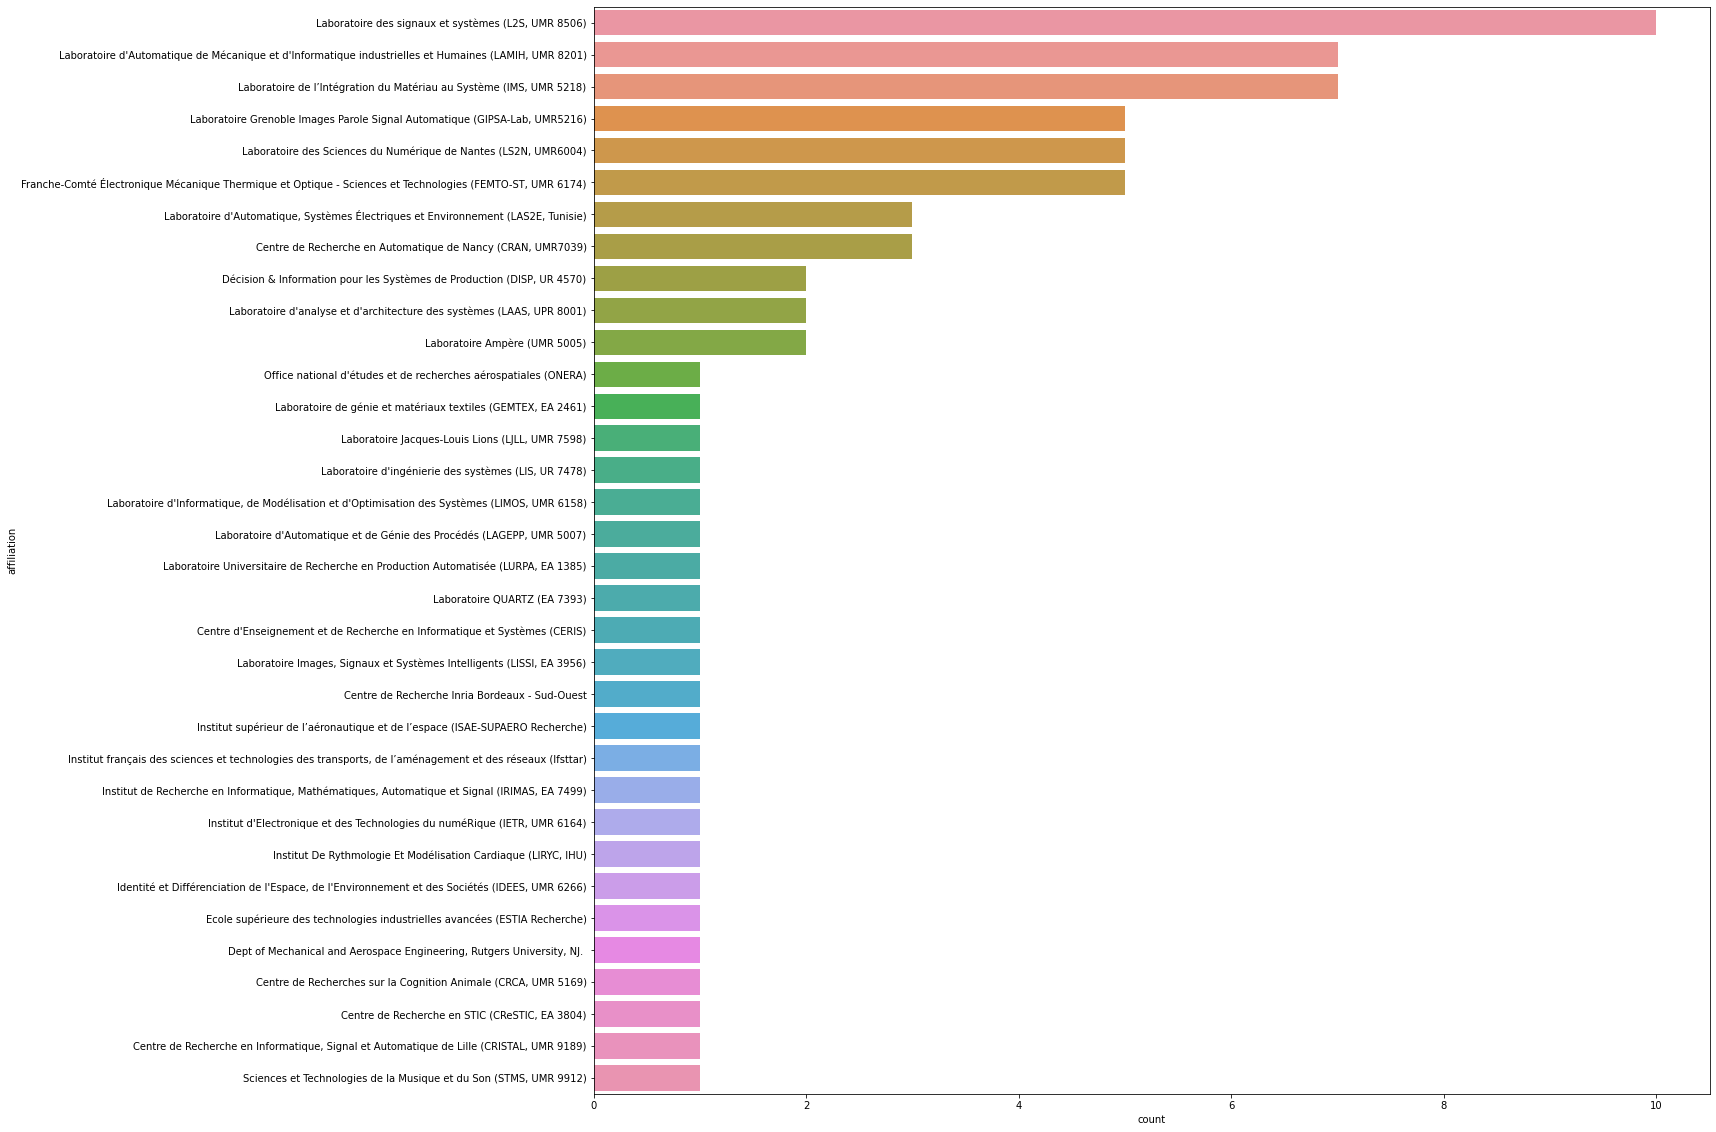

In [190]:
plt.figure(figsize=(20,20))
sns.countplot(y="affiliation",
              order = question_df.groupby(['affiliation']).last_name.count().reset_index().sort_values(by='last_name',
                                                                                                     ascending=False).affiliation,
              data=question_df)


In [192]:
question_df.pain_points.unique()

array(["Lourdeur administrative pour achat de matÃ©riel expÃ©rimental et l'utilisation des donnÃ©es",
       "manque de financement, manque d'ouverture d'esprit des journaux lors des publications, mauvaises perpectives de carriÃ¨re aprÃ¨s (ah mais non t'est pas vraiment automaticien toi ...)",
       nan,
       'les praticiens sont trÃ¨s sollicitÃ©s et il est trÃ¨s difficile de caler une rÃ©union. ',
       'complexitÃ© des problÃ¨me, un grand Ã©cart dans les objectifs, et les fonds',
       "communication et mÃ©fiance Ã\xa0 l'Ã©gard de l'IA",
       'La taille des Ã©quipes travaillant sur ces sujets et le manque de collaborations',
       'Ã©tablir une relation de confiance et gagnant-gagnant',
       'ressources financiÃ¨res (financement doctorants + postdoc)',
       'acceptabilitÃ© des outils/mÃ©thodes par le monde mÃ©dical',
       "(i) difficultÃ©s des autorisations d'essais cliniques, protection des donnÃ©es, avec un temps de rÃ©ponse >> durÃ©e de vie d'un doctorant (ii) relati